In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib import pyplot as plt

C:\Users\laststar\anaconda3\envs\rl-learn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0	 Loss: 1.963446021080017
Epoch: 10000	 Loss: 0.005510434508323669
Epoch: 20000	 Loss: 0.0012541706673800945
Epoch: 30000	 Loss: 0.000517062027938664
Epoch: 40000	 Loss: 0.00025842091417871416
Epoch: 0	 Loss: 0.00014345778618007898
Epoch: 10000	 Loss: 2.303518522239756e-05
Epoch: 20000	 Loss: 1.5806455849087797e-05
Epoch: 30000	 Loss: 1.2085323760402389e-05
Epoch: 40000	 Loss: 9.628629413782619e-06
Epoch: 0	 Loss: 7.87815406511072e-06
Epoch: 10000	 Loss: 0.0010523528326302767
Epoch: 20000	 Loss: 0.0009029469219967723
Epoch: 30000	 Loss: 0.0008344799280166626
Epoch: 40000	 Loss: 0.0008004211122170091
Epoch: 0	 Loss: 0.000777345965616405
Epoch: 10000	 Loss: 3.4917179618787486e-06
Epoch: 20000	 Loss: 2.4540772756154183e-06
Epoch: 30000	 Loss: 2.0452807802939788e-06
Epoch: 40000	 Loss: 1.8980406366608804e-06


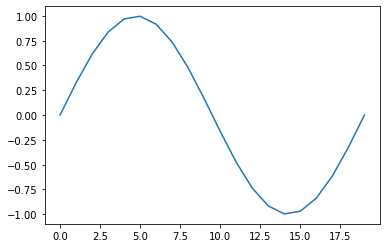

In [45]:

# 훈련용 데이터를 생성한 후 케라스의 입력에 맞게 차원을 수정(샘플 개수, 입력 개수)
train_x = np.linspace(0, np.pi * 2, 20).reshape(20, 1)

# 훈련용 정답 데이터
train_Y = np.sin(train_x)

# 테스트용 데이터를 생성한 후 케라스의 입력에 맞게 차원을 수정(샘플 개수, 입력 개수)
test_x = np.linspace(0, np.pi * 2, 20).reshape(20,1)

# 테스트용 정답 데이터
test_y = np.sin(test_x)

plt.plot(test_y)

# 입력층의 뉴런 수
input_node = 1

# 중간층의 뉴런 수
hidden_node = 3

# 출력층의 뉴런 수
output_node = 1

# 모델 초기화
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.Sigmoid(),
    nn.Linear(3,1)
)

alpha = 0.1

# 4가지(sgd, momentum, RMSprop, Adam) 최적화 방법을 딕셔너리로 정의
optimizer_option = {
    'sgd': optim.SGD(params=model.parameters(), lr=0.1),
    'momentum': optim.SGD(params=model.parameters(), lr=alpha, momentum=0.9),
    'RM-Sprop': optim.RMSprop(params=model.parameters(),lr=0.01),
    'Adam': optim.Adam(params=model.parameters() ,lr=0.01)
}


result = {
    'sgd': [],
    'momentum': [],
    'RM-Sprop': [],
    'Adam': []
}

criterion = nn.MSELoss()

for optimizer_name, optimizer in optimizer_option.items():

    for epoch in range(50000):

        output = model(torch.Tensor(train_x))

        loss = criterion(output, torch.Tensor(train_Y))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10000 == 0:
            print(f'Epoch: {epoch}\t Loss: {loss.item()}')
            
            result[optimizer_name].append(output)

    pred = model(torch.Tensor(test_x))
    
    result[optimizer_name].append(pred)


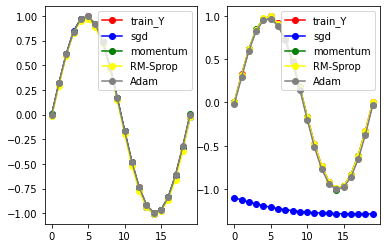

In [48]:
data = train_Y.reshape(-1,)

plt.subplot(1, 2, 1)


plt.plot(range(len(data)), data, color='red', marker='o')
plt.plot(range(20), result['sgd'][-1].reshape(-1,).detach().numpy(), color='blue', marker='o')
plt.plot(range(20), result['momentum'][-1].reshape(-1,).detach().numpy(), color='green', marker='o')
plt.plot(range(20), result['RM-Sprop'][-1].reshape(-1,).detach().numpy(), color='yellow', marker='o')
plt.plot(range(20), result['Adam'][-1].reshape(-1,).detach().numpy(), color='gray', marker='o')

plt.legend(['train_Y', 'sgd', 'momentum', 'RM-Sprop', 'Adam'])

plt.subplot(1, 2, 2)

plt.plot(range(len(data)), data, color='red', marker='o')
plt.plot(range(20), result['sgd'][0].reshape(-1,).detach().numpy(), color='blue', marker='o')
plt.plot(range(20), result['momentum'][0].reshape(-1,).detach().numpy(), color='green', marker='o')
plt.plot(range(20), result['RM-Sprop'][0].reshape(-1,).detach().numpy(), color='yellow', marker='o')
plt.plot(range(20), result['Adam'][0].reshape(-1,).detach().numpy(), color='gray', marker='o')

plt.legend(['train_Y', 'sgd', 'momentum', 'RM-Sprop', 'Adam'])

plt.show()

In [ ]:
result['sgd'][-1].reshape(-1,).numpy()

In [ ]:
len(result['sgd'][-1].reshape(-1,))

In [33]:
train_Y.reshape(-1,)

array([ 0.00000000e+00,  3.24699469e-01,  6.14212713e-01,  8.37166478e-01,
        9.69400266e-01,  9.96584493e-01,  9.15773327e-01,  7.35723911e-01,
        4.75947393e-01,  1.64594590e-01, -1.64594590e-01, -4.75947393e-01,
       -7.35723911e-01, -9.15773327e-01, -9.96584493e-01, -9.69400266e-01,
       -8.37166478e-01, -6.14212713e-01, -3.24699469e-01, -2.44929360e-16])